# First Example: Check If Your Local ROOT Can Run A Simple PyROOT Notebook

In [1]:
import ROOT

Let's try to 
- create a set of random numbers
- that are distributed according to a Gaussian distribution
- and see if we can plot these numbers

Please let Seyma or Martin know if you have any issues running this example either using the ROOT installation on your computer or in the virtual machine!

## Define the Gaussian Distribution As A Formula With Two Parameters $\sigma$ and $\mu$

Note: there is already a built-in `gaus` formula that you would normally use, but in order to test something simple, we are defining our own formula

In [2]:
gauss_fml = ROOT.TFormula("gauss_fml", "1/([sigma]*sqrt(2*pi)) * exp(-0.5*((x-[mu])/[sigma])*((x-[mu])/[sigma]))" )

## Createa 1D Sequences For Different Parameterisations of the Gaussian Distributions

In order to generate a sequence of values according to the formula `gaus_fml`, we have to set the values for the two distribution parameters`[sigma]` and `[mu]` 

In [3]:
# By default, the parameters are ordered alphabetically, so [mu] is first, then comes [sigma]
gauss_fml.SetParameters( 0.0, 1.5 ) 

# We can retrieve the values for the two parameters using the "Getter" functions:
sigma = gauss_fml.GetParameter( "sigma" ) 
mu = gauss_fml.GetParameter( "mu" ) 
print( f"mu: {mu}, sigma: {sigma}" )

# There is a similar way to set individual parameters, we will be using that in a few steps

mu: 0.0, sigma: 1.5


## Plot The Sequences

In order to "Draw" something (like a plot), we needa a "Canvas":

In [4]:
c1 = ROOT.TCanvas( "c1", "Gaussian Distribution" )

Lets generate a sequence of values by evaluating the `gauss_fml` formula on an interval $[x_{min}, x_{max}]$. Since we know that almost all values are within $\pm 3\cdot\sigma$ around the mean value $\mu$, we can use this to find values for $x_{min}$ and $x_{max}$:

In [5]:
xmin = mu - 4.0 * sigma
xmax = mu + 4.0 * sigma

# gauss_values0 is a 1D manifold that can have values between the xmin and xmax boundaries:
gauss_values0 = ROOT.TF1( "gauss_values0", "gauss_fml", xmin, xmax )

Let's change one of the distribution parameters and create a second 1D manifold:

In [6]:
gauss_fml.SetParameter( "mu", 1.0 )
gauss_values1 = ROOT.TF1( "gauss_values1", "gauss_fml", xmin, xmax )

Please check [the documentation](https://root.cern.ch/doc/master/classTAttLine.html) for an explaination of what the numbers in the `SetLineColor`, `SetLineWidth` and `SetLineAttributes` command refer to

In [7]:
c1.SetGridx()
c1.SetGridy()
gauss_values0.SetLineColor( 9 )
gauss_values0.SetLineStyle( 1 )
gauss_values0.SetLineWidth( 2 )
gauss_values0.Draw()

gauss_values1.SetLineColor( 6 )
gauss_values1.SetLineStyle( 2 )
gauss_values1.SetLineWidth( 1 )
# Using "SAME" in the Draw command re-uses the same canvas for the second plot
gauss_values1.Draw( "SAME" )


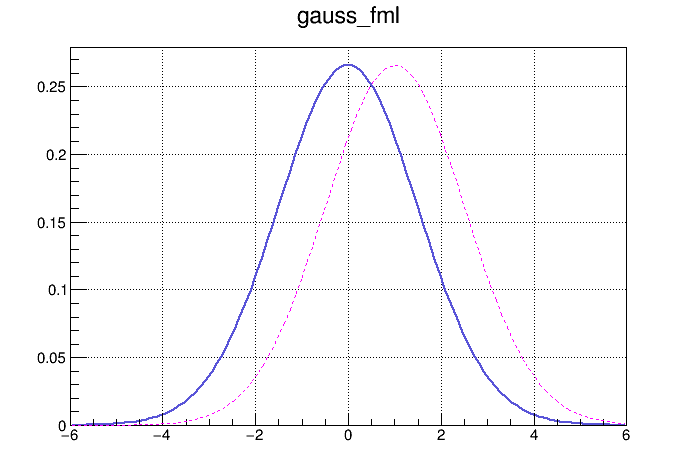

In [8]:
c1.Draw()

## Create Pseudo Random Numbers & Visualise Them As A Histogramm

In [9]:
c2 = ROOT.TCanvas( "c2", "Histogramm" )

In [10]:
n_bins = 50
n_numbers = 10000
histogram1 = ROOT.TH1F( "histogram1", "Pseudo-Random Numbers", n_bins, xmin, xmax )
histogram1.SetFillColor( 11 )

# We are using the "ranged" 1D expression rather than the formula. Otherwise, the "random number generator" would not 
# know for which interval to generate values:
histogram1.FillRandom( "gauss_values1", n_numbers ) 
histogram1.Draw()
histogram1.GetXaxis().SetTitle( "x" )
histogram1.GetXaxis().CenterTitle(True)
histogram1.GetYaxis().SetTitle( "Number of Occurances" )
histogram1.GetYaxis().CenterTitle(True)

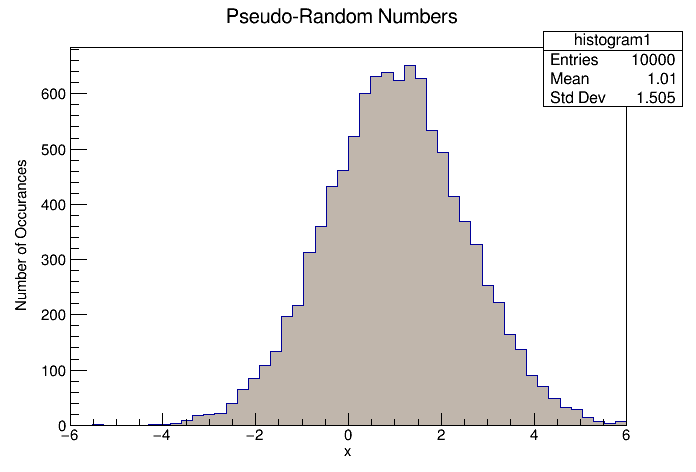

In [11]:
c2.Draw()

## Save Some Of The Expressions (and Data) We Have Created Into a ROOT File

In [14]:
output_file = ROOT.TFile( "./example1_gaussian_distribution_python.root", "RECREATE" )

gauss_fml.Write()
histogram1.Write()
output_file.Close()